# tqix: basic in quantum mechanics

Author: $Le\ Bin\ Ho$

##### In this tutorial, we introduce several quantums systems and evolution

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tqix import *

### 1. Schrödinger equation
Given a quantum system in state $|\psi\rangle$,
it evolves to $|\psi(t)\rangle$ at time $t$ 
under a unitary transformation $U(t)$.
<br>
Example: consider a qubit initially prepared in $|\psi\rangle = |0\rangle$. 
The evolution is $U(t) = e^{-it (0.5\sigma_z^2 + \sigma_x)}$.
<br>
We can evaluate the expectations of the Pauli operators as follows:

In [19]:
q = obasis(2,0)

def u(t):
    return expx(-1j*t*(0.5*sigmaz()**2 + sigmax()))

The evloved state at time $t$

In [20]:
def qt(t):
    return dotx(u(t),q)

##### Expectation value
Using qmes() function to evaluate the expectation value

In [21]:
t = np.linspace(0, 5, 100)
expect_x, expect_y, expect_z = [], [], []
for i in t:
    expect = qmeas(qt(i),[sigmax(),sigmay(),sigmaz()])
    ex = expect.probability()[0]
    ey = expect.probability()[1]
    ez = expect.probability()[2]
    
    expect_x.append(ex)
    expect_y.append(ey)
    expect_z.append(ez)
    

###### Plot figure

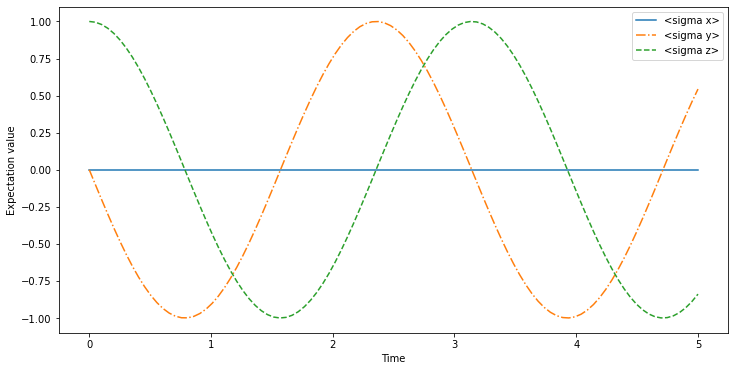

In [22]:
f1,ax = plt.subplots(figsize=(12,6))
ax.plot(t,np.real(expect_x),'-')
ax.plot(t,np.real(expect_y),'-.')
ax.plot(t,np.real(expect_z),'--')

ax.legend(('<sigma x>', '<sigma y>', '<sigma z>'))
ax.set_xlabel('Time')
ax.set_ylabel('Expectation value');

plt.show()

### 2. Interaction model: a Quantum Ising model in a transverse field
Consider the interction of two qubits and an external magnetic field

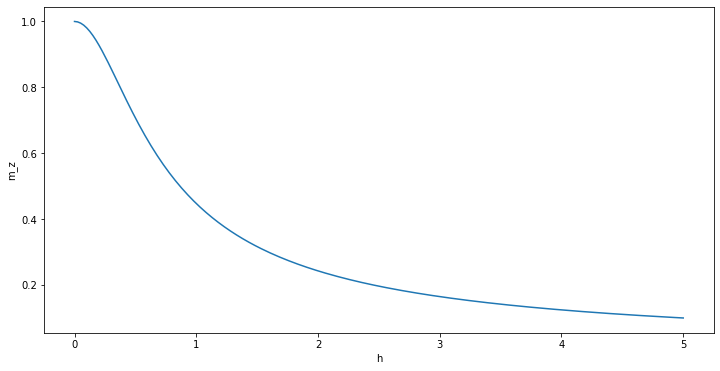

In [23]:
# initial state
psi = dicke(2,1)

# Hamitonian
def hamilton(J,h):
    return -J*tensorx(sigmaz(),sigmaz())-h*(tensorx(sigmax(),eyex(2)) + tensorx(eyex(2),sigmax()))

J = 1.
h = np.linspace(0, 5, 200)

#  hysteresis curve
m_list = []

for i in h:
    # ground state
    gs = groundx(hamilton(J,i))
    
    # observable 
    obs = tensorx(sigmaz(),sigmaz())
    # magneticzation
    m = qmeas(gs,[obs])
    m_list.append(m.probability()[0])
    
# plot magnetization
f1,ax = plt.subplots(figsize=(12,6))
ax.plot(h,np.real(m_list),'-')

#ax.legend(('m'))
ax.set_xlabel('h')
ax.set_ylabel('m_z');

plt.show()    

In [24]:
about()


tqix: Quantum computor Simulation code
copyright (c) 2019 and later.
authors: Binho Le 

tqix Version:       1.0.1
Numpy Version:      1.19.2
Scipy Version:      1.5.2
Cython Version:     None
Matplotlib Version: 3.3.2
Python Version:     3.8.5
Number of CPUs:     4
Platform Info:      Darwin (x86_64)

